<a href="https://colab.research.google.com/github/karladg31/Diplomado-Ciencia-de-Datos/blob/main/Presentaci%C3%B3n2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importar datos**

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [2]:
pd.read_csv('/content/diabetes_data.csv')

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


In [3]:
df = pd.read_csv('/content/diabetes_data.csv')

In [4]:
df.shape

(70692, 18)

In [5]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


### **Análisis de los datos**

In [6]:
#gráfica de edades
df_frecuencia = df['Age'].value_counts().reset_index()
df_frecuencia.columns = ['Age', 'Patients']
fig = px.bar(df_frecuencia, x='Age', y='Patients', color = 'Age', title='Categorización de las edades')
fig.show()

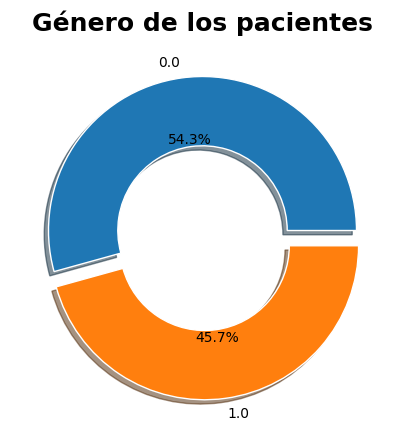

In [7]:
#gráfica de género
plt.figure(figsize=(5,5))
df_frecuencia = df['Sex'].value_counts()
plt.pie(df_frecuencia.values, labels= df_frecuencia.index, autopct="%.1f%%",
        wedgeprops=dict(width=0.45, edgecolor='w'), shadow = True, explode = [0, 0.1], )
plt.title("Género de los pacientes", fontsize = 18, weight='bold')
plt.show();

<ipython-input-8-139089f2dc99>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



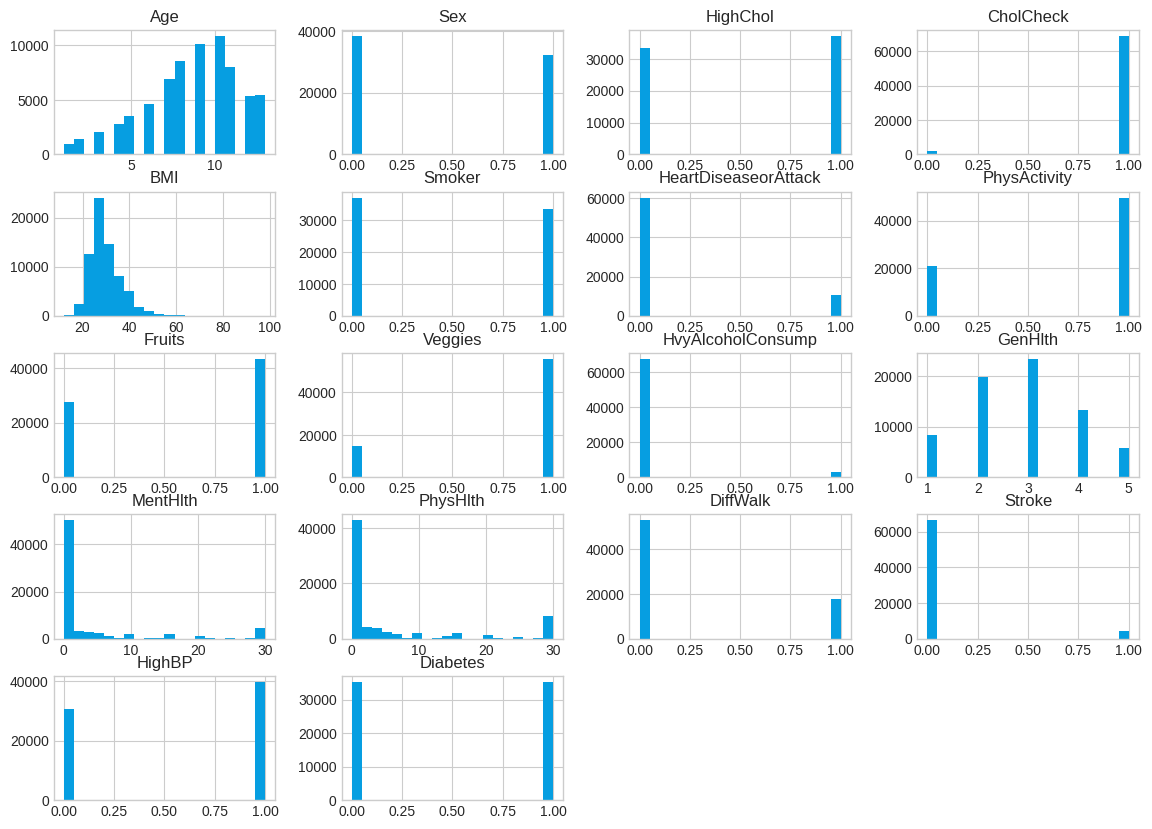

In [8]:
plt.style.use('seaborn-whitegrid')
df.hist(bins=20, figsize=(14,10), color='#069EE1')
plt.show();

In [9]:
corr_matrix = df.corr()
fig = px.imshow(corr_matrix, color_continuous_scale = 'RdBu', range_color=[-1,1], text_auto = True, aspect = "auto", labels=dict(color="Correlation"), title='Matriz de correlación', height = 800)
fig.update(layout_coloraxis_showscale=False)

Text(0.5, 1.0, 'Relación Rango de edad - diabetes')

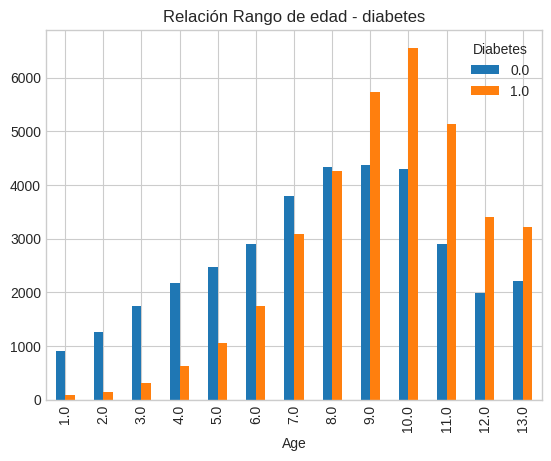

In [10]:
ax = df.groupby(['Age', 'Diabetes']).size().unstack().plot(kind='bar')
ax.set_title('Relación Rango de edad - diabetes')

Text(0.5, 1.0, 'Relación colesterol alto - diabetes')

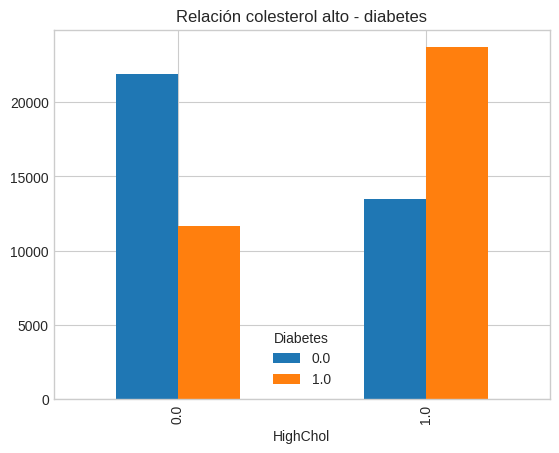

In [11]:
ax = df.groupby(['HighChol', 'Diabetes']).size().unstack().plot(kind='bar')
ax.set_title('Relación colesterol alto - diabetes')

Text(0.5, 1.0, 'Relación BMI - diabetes')

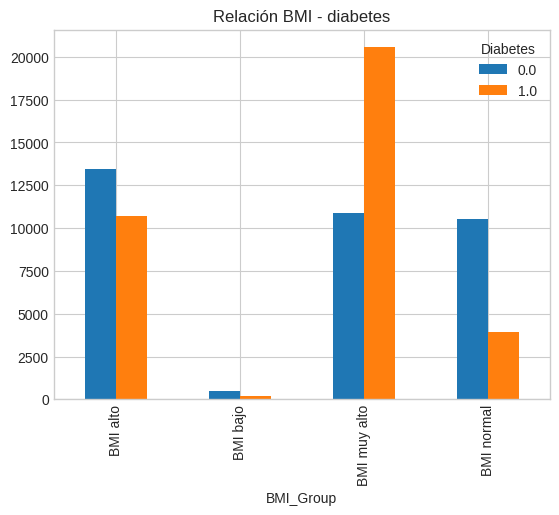

In [12]:
def f(BMI):
    if BMI < 18.5:
        return 'BMI bajo'
    elif BMI < 25:
        return 'BMI normal'
    elif BMI < 30:
        return 'BMI alto'
    elif BMI >= 30:
        return 'BMI muy alto'

df['BMI_Group'] = df.BMI.apply(f)
ax = df.groupby(['BMI_Group', 'Diabetes']).size().unstack().plot(kind='bar')
ax.set_title('Relación BMI - diabetes')

Text(0.5, 1.0, 'Relación Padeció enfermedad cardiaca - diabetes')

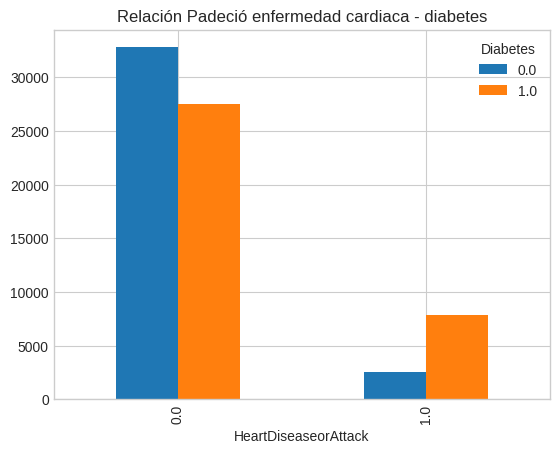

In [13]:
ax = df.groupby(['HeartDiseaseorAttack', 'Diabetes']).size().unstack().plot(kind='bar')
ax.set_title('Relación Padeció enfermedad cardiaca - diabetes')

Text(0.5, 1.0, 'Relación Dificultad para caminar - diabetes')

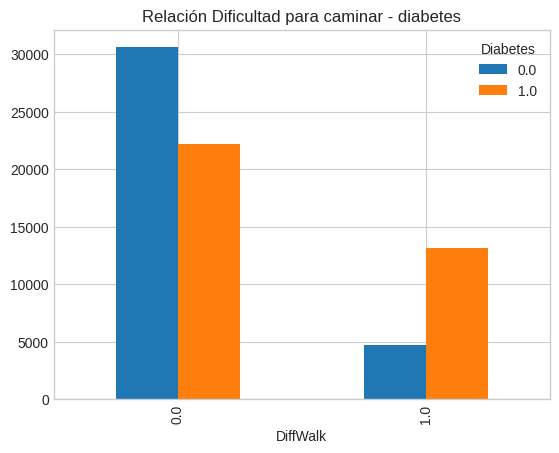

In [14]:
ax = df.groupby(['DiffWalk', 'Diabetes']).size().unstack().plot(kind='bar')
ax.set_title('Relación Dificultad para caminar - diabetes')

Text(0.5, 1.0, 'Relación Presión alta - diabetes')

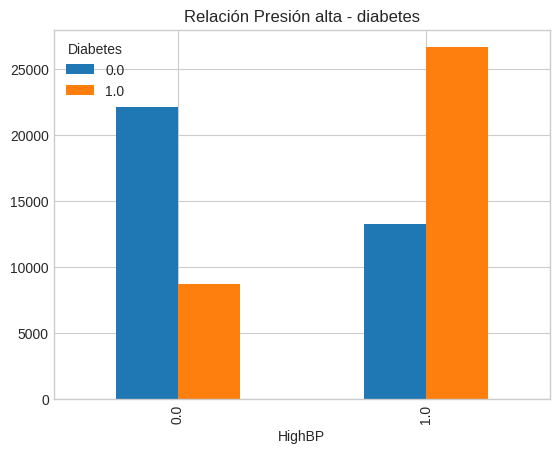

In [15]:
ax = df.groupby(['HighBP', 'Diabetes']).size().unstack().plot(kind='bar')
ax.set_title('Relación Presión alta - diabetes')

### **Modelos**

K-Nearest Neighbors (KNN)

In [16]:
import seaborn as sns
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [17]:
X = df.drop(columns=['Diabetes'])
y = df['Diabetes']
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)

In [18]:
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f"KNN Accuracy: {knn_accuracy:.6f}")

KNN Accuracy: 0.713912


In [19]:
knn_precision = precision_score(y_test, knn_pred)
print(f"KNN Precision: {knn_precision:.6f}")

KNN Precision: 0.699310


In [20]:
knn_recall = recall_score(y_test, knn_pred)
print(f"KNN Recall: {knn_recall:.6f}")

KNN Recall: 0.747624


In [21]:
knn_f1 = f1_score(y_test, knn_pred)
print(f"KNN F1 Score: {knn_f1:.6f}")

KNN F1 Score: 0.722660


In [22]:
knn_report = classification_report(y_test, knn_pred)
print(knn_report)

              precision    recall  f1-score   support

         0.0       0.73      0.68      0.70      7090
         1.0       0.70      0.75      0.72      7049

    accuracy                           0.71     14139
   macro avg       0.71      0.71      0.71     14139
weighted avg       0.71      0.71      0.71     14139



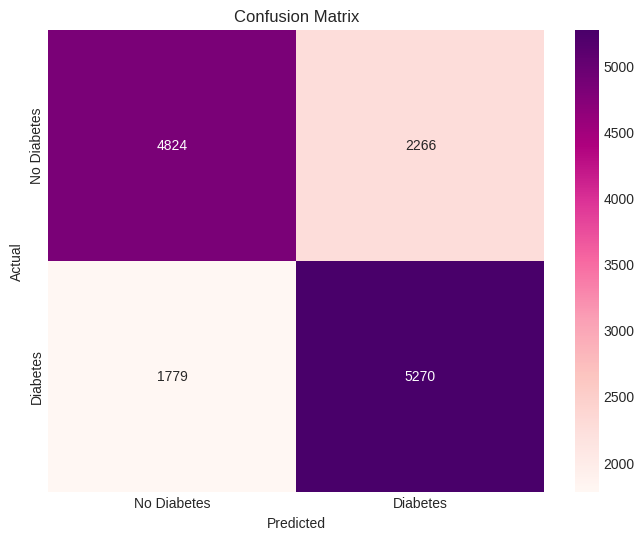

In [23]:
#knn_cm = confusion_matrix(y_test, knn_pred)
#plot_confusion_matrix(knn_cm, ['No Diabetes', 'Diabetes'])
knn_cm = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, cmap='RdPu', fmt='g', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Decision Trees

In [24]:
X = df.drop(columns=['Diabetes'])
y = df['Diabetes']
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
dt_pred = dt.predict(X_test_scaled)

In [25]:
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Decision Trees Accuracy: {dt_accuracy:.2f}")

Decision Trees Accuracy: 0.66


In [26]:
dt_precision = precision_score(y_test, dt_pred)
print(f"Decision Trees Precision: {dt_precision:.2f}")

Decision Trees Precision: 0.66


In [27]:
dt_recall = recall_score(y_test, dt_pred)
print(f"Decision Trees Recall: {dt_recall:.2f}")

Decision Trees Recall: 0.64


In [28]:
dt_f1 = f1_score(y_test, dt_pred)
print(f"Decision Trees F1 Score: {dt_f1:.2f}")

Decision Trees F1 Score: 0.65


In [29]:
dt_report = classification_report(y_test, dt_pred)
print(dt_report)

              precision    recall  f1-score   support

         0.0       0.66      0.68      0.67      7090
         1.0       0.66      0.64      0.65      7049

    accuracy                           0.66     14139
   macro avg       0.66      0.66      0.66     14139
weighted avg       0.66      0.66      0.66     14139



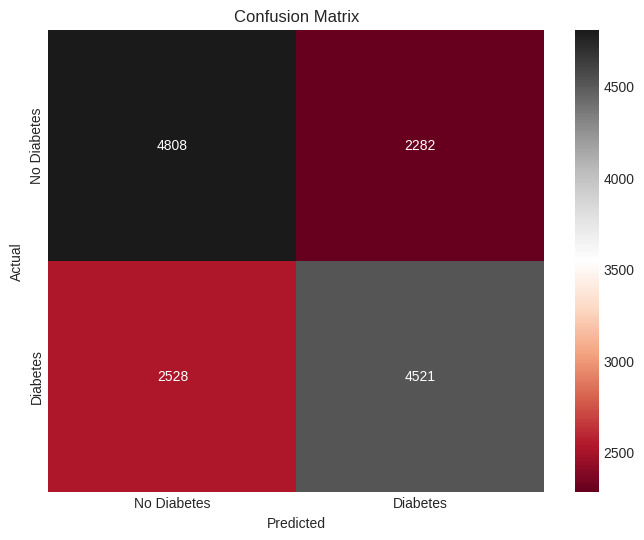

In [30]:
dt_cm = confusion_matrix(y_test, dt_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, cmap='RdGy', fmt='g', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Random Forest**

In [31]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

Random Forest Accuracy: 0.73


In [32]:
rf_precision = precision_score(y_test, rf_pred)
print(f"Random Forest Precision: {rf_precision:.2f}")

Random Forest Precision: 0.71


In [33]:
rf_recall = recall_score(y_test, rf_pred)
print(f"Random Forest Recall: {rf_recall:.2f}")

Random Forest Recall: 0.76


In [34]:
rf_f1 = f1_score(y_test, rf_pred)
print(f"Random Forest F1 Score: {rf_f1:.2f}")

Random Forest F1 Score: 0.74


In [35]:
rf_report = classification_report(y_test, rf_pred)
print(rf_report)

              precision    recall  f1-score   support

         0.0       0.75      0.69      0.72      7090
         1.0       0.71      0.76      0.74      7049

    accuracy                           0.73     14139
   macro avg       0.73      0.73      0.73     14139
weighted avg       0.73      0.73      0.73     14139



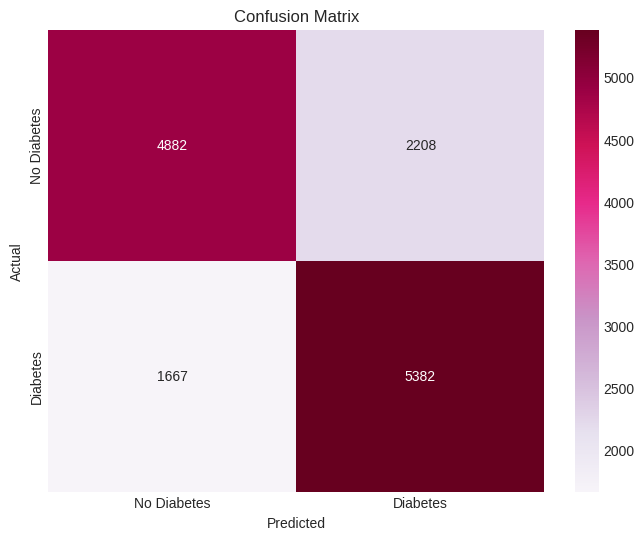

In [36]:
rf_cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, cmap='PuRd', fmt='g', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Logistic Regression**

In [37]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [38]:
lr_pred = lr.predict(X_test_scaled)

In [39]:
lr_accuracy = accuracy_score(y_test, lr_pred)
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")

Logistic Regression Accuracy: 0.75


In [40]:
lr_precision = precision_score(y_test, lr_pred)
print(f"Logistic Regression Precission: {lr_precision:.2f}")

Logistic Regression Precission: 0.74


In [41]:
lr_recall = recall_score(y_test, lr_pred)
print(f"Logistic Regression Recall: {lr_recall:.2f}")

Logistic Regression Recall: 0.77


In [42]:
lr_f1 = f1_score(y_test, lr_pred)
print(f"Logistic Regression F1 Score: {lr_f1:.2f}")

Logistic Regression F1 Score: 0.75


In [43]:
lr_report = classification_report(y_test, lr_pred)
print("Logistic Regression Classification Report:")
print(lr_report)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74      7090
         1.0       0.74      0.77      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



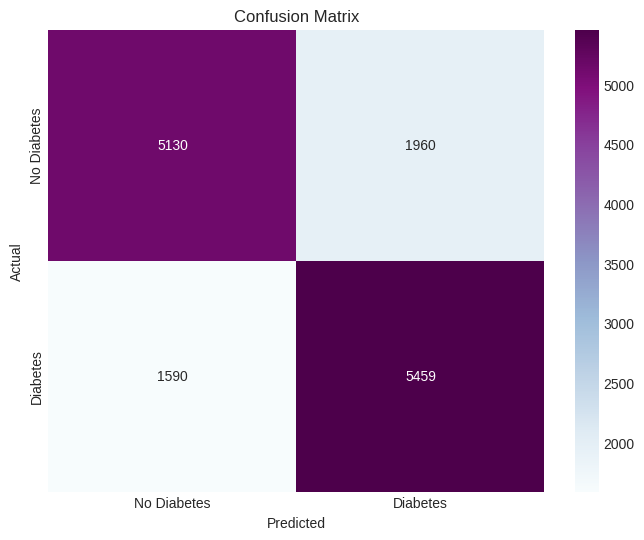

In [44]:
lr_cm = confusion_matrix(y_test, lr_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm, annot=True, cmap='BuPu', fmt='g', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Support Vector Machines (SVM)**

In [45]:
svm = SVC()
svm.fit(X_train_scaled, y_train)

SVC()

In [46]:
svm_pred = svm.predict(X_test_scaled)

In [47]:
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"SVM Accuracy: {svm_accuracy:.2f}")

SVM Accuracy: 0.75


In [48]:
svm_precision = precision_score(y_test, svm_pred)
print(f"SVM Precission: {svm_precision:.2f}")

SVM Precission: 0.72


In [49]:
svm_recall = recall_score(y_test, svm_pred)
print(f"KNN Recall: {svm_recall:.2f}")

KNN Recall: 0.80


In [50]:
svm_f1 = f1_score(y_test, svm_pred)
print(f"SVM F1 Score: {svm_f1:.2f}")

SVM F1 Score: 0.76


In [51]:
svm_report = classification_report(y_test, svm_pred)
print("SVM Classification Report:")
print(svm_report)

SVM Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.69      0.73      7090
         1.0       0.72      0.80      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



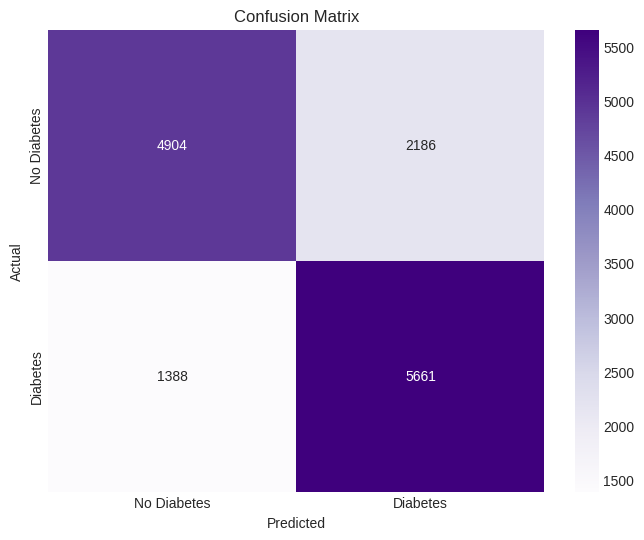

In [52]:
svm_cm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, cmap='Purples', fmt='g', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Naive Bayes**

In [53]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

GaussianNB()

In [54]:
nb_pred = nb.predict(X_test_scaled)

In [55]:
nb_accuracy = accuracy_score(y_test, nb_pred)
print(f"Naive Bayes Accuracy: {nb_accuracy:.2f}")

Naive Bayes Accuracy: 0.73


In [56]:
nb_precision = precision_score(y_test, nb_pred)
print(f"Naive Bayes Precission: {nb_precision:.2f}")

Naive Bayes Precission: 0.71


In [57]:
nb_recall = recall_score(y_test, nb_pred)
print(f"Naive Bayes Recall: {nb_recall:.2f}")

Naive Bayes Recall: 0.78


In [58]:
nb_f1 = f1_score(y_test, nb_pred)
print(f"Naive Bayes F1 Score: {nb_f1:.2f}")

Naive Bayes F1 Score: 0.74


In [59]:
nb_report = classification_report(y_test, nb_pred)
print("Naive Bayes Classification Report:")
print(nb_report)

Naive Bayes Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.69      0.72      7090
         1.0       0.71      0.78      0.74      7049

    accuracy                           0.73     14139
   macro avg       0.73      0.73      0.73     14139
weighted avg       0.74      0.73      0.73     14139



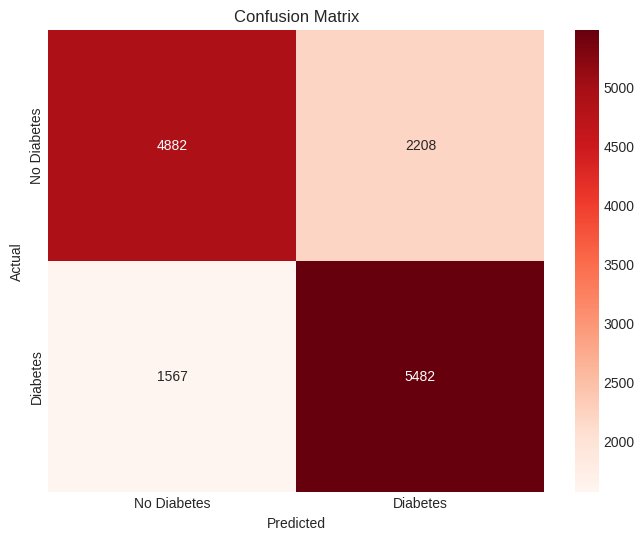

In [60]:
nb_cm = confusion_matrix(y_test, nb_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(nb_cm, annot=True, cmap='Reds', fmt='g', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Comparación de modelos**

In [61]:
models_data = {
    'Model': ['Logistic Regression', 'K-Nearest Neighbors', 'SVM', 'Naive Bayes', 'Decision Trees', 'Random Forest'],
    'Accuracy': [lr_accuracy, knn_accuracy, svm_accuracy, nb_accuracy, dt_accuracy, rf_accuracy],
    'Precision': [lr_precision, knn_precision, svm_precision, nb_precision, dt_precision, rf_precision],
    'Recall': [lr_recall, knn_recall, svm_recall, nb_recall, dt_recall, rf_recall],
    'F1-Score': [lr_f1, knn_f1, svm_f1, nb_f1, dt_f1, rf_f1]
}

df_models = pd.DataFrame(models_data)
df_models

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.748921,0.735813,0.774436,0.754631
1,K-Nearest Neighbors,0.713912,0.699310,0.747624,0.722660
2,SVM,0.747224,0.721422,0.803093,0.760070
3,Naive Bayes,0.733008,0.712874,0.777699,0.743877
4,Decision Trees,0.659806,0.664560,0.641368,0.652758
5,Random Forest,0.725935,0.709091,0.763513,0.735296


In [62]:
fig_accuracy = px.bar(df_models, x='Model', y='Accuracy', title='Model Comparison - Accuracy', template = 'plotly_white', text = 'Accuracy')
fig_accuracy.update_layout(yaxis=dict(range=[0, 1]))
fig_accuracy.show()

In [63]:
fig_precision = px.bar(df_models, x='Model', y='Precision', title='Model Comparison - Precision', template = 'plotly_white', text = 'Precision')
fig_precision.update_layout(yaxis=dict(range=[0, 1]))
fig_precision.show()


In [64]:
fig_recall = px.bar(df_models, x='Model', y='Recall', title='Model Comparison - Recall', template = 'plotly_white', text = 'Recall')
fig_recall.update_layout(yaxis=dict(range=[0, 1]))
fig_recall.show()

In [65]:
fig_f1_score = px.bar(df_models, x='Model', y='F1-Score', title='Model Comparison - F1-Score', template = 'plotly_white', text = 'Recall')
fig_f1_score.update_layout(yaxis=dict(range=[0, 1]))
fig_f1_score.show()